# Making question

## Import Các thư viện cần thiết

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None) 
import re
from moviepy import ImageSequenceClip
import os
from IPython.display import Video



Đọc dữ liệu từ các file csv đã được làm sạch

In [245]:
match_overview_df = pd.read_csv('./data/clean_data/match_overview.csv', delimiter='\t')
match_statistics_df = pd.read_csv('./data/clean_data/match_statistics.csv', delimiter='\t')
team_ranking_df = pd.read_csv('./data/clean_data/team_rankings.csv', delimiter=',')
team_profile_df = pd.read_csv('./data/clean_data/team_profile.csv', delimiter=',')

In [246]:
match_overview_df.head(5)

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner
0,3050173,2018-08-11,18/19,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2,Tottenham Hotspur
1,3050169,2018-08-11,18/19,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2,Crystal Palace
2,3050168,2018-08-11,18/19,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0,AFC Bournemouth
3,3050176,2018-08-11,18/19,Wolverhampton Wanderers,Everton FC,3-4-3,4-2-3-1,2:2,Draw
4,3050172,2018-08-10,18/19,Manchester United,Leicester City,4-1-4-1,4-4-2 double 6,2:1,Manchester United


In [247]:
match_statistics_df.head(10)

,match_id,home_total_shots,home_shots_saved,home_corners,home_free_kicks,home_offsides,home_fouls,away_total_shots,away_shots_saved,away_corners,away_free_kicks,away_offsides,away_fouls,home_cards,away_cards
0,3050176,4,3,3,10,7,2,5,2,6,9,7,3,0,3
1,3050173,2,4,3,12,11,1,6,1,5,12,12,0,2,2
2,3050175,5,1,8,19,13,0,1,2,2,13,16,3,2,2
3,3050171,8,2,5,12,14,5,2,4,4,19,9,3,1,2
4,3050170,2,1,2,9,8,2,4,2,5,10,8,1,2,1
5,3050172,6,3,2,9,11,4,4,4,5,15,7,2,2,1
6,3050174,3,6,8,15,12,2,6,3,5,14,11,4,0,1
7,3050167,3,7,2,15,11,7,9,3,9,18,13,2,2,2
8,3050168,3,1,7,10,12,0,1,0,4,12,8,2,1,1
9,3050169,6,7,5,14,8,2,9,6,5,10,11,3,1,2


In [248]:
team_ranking_df.head(10)

,Season,Team,Ranking,Wins,Draws,Losses,Goals Scored,Goals Conceded
0,14/15,Chelsea FC,1,26,9,3,73,32
1,14/15,Manchester City,2,24,7,7,83,38
2,14/15,Arsenal FC,3,22,9,7,71,36
3,14/15,Manchester United,4,20,10,8,62,37
4,14/15,Tottenham Hotspur,5,19,7,12,58,53
5,14/15,Liverpool FC,6,18,8,12,52,48
6,14/15,Southampton FC,7,18,6,14,54,33
7,14/15,Swansea City,8,16,8,14,46,49
8,14/15,Stoke City,9,15,9,14,48,45
9,14/15,Crystal Palace,10,13,9,16,47,51


In [249]:
team_profile_df.head(10)

,Season,Club,Squad,Average age,Foreigners,Total market value
0,14/15,Chelsea FC,38,25.4,28,0.358592
1,14/15,Manchester United,43,25.4,26,0.321752
2,14/15,Manchester City,34,27.1,27,0.281147
3,14/15,Arsenal FC,42,24.5,29,0.257345
4,14/15,Liverpool FC,35,24.8,21,0.193470
5,14/15,Tottenham Hotspur,42,25.2,25,0.178763
6,14/15,Southampton FC,37,25.1,20,0.112047
7,14/15,Everton FC,40,25.7,22,0.092579
8,14/15,Newcastle United,42,24.4,28,0.062134
9,14/15,West Ham United,36,26.2,21,0.059221


## Câu hỏi 1: Mối liên hệ giữa chất lượng của một trận đấu với các thông số của trận đấu như thế nào?

**Ý nghĩa của câu hỏi:**  
Trả lời câu hỏi này sẽ giúp chúng ta biết được các đội mạnh/yếu khi đối đầu với nhau thì sẽ có những chiến thuật gì

**Các DataFrame được sử dụng để phân tích:**  
- `team_ranking_df`: Chứa dữ liệu về thứ hạng của các đội bóng.  
- `match_overview_df`: Chứa dữ liệu về thông số của mỗi trận đấu
- `match_statistic_df`: Chứa dữ liệu về thông số của mỗi trận đấu

Đầu tiên, ta cần xây dựng thêm một cột đánh giá chất lượng của một trận đấu, chất lượng này dựa trên kết quả thứ hạng cuối cùng của hai đội bóng trong mùa giải đó.

- **Excellent**: Tổng thứ hạng từ 2-8
- **Good**: Tổng thứ hạng từ 9-16
- **Average**: Tổng thứ hạng từ 17-24
- **Low**: Tổng thứ hạng từ 25 trở lên

Để làm được điều đó, ta cần lấy thứ hạng của mỗi đội bóng trong mùa giải

In [250]:
def get_team_ranking(season, team):
    ranking = team_ranking_df[
        (team_ranking_df['Season'] == season) & 
        (team_ranking_df['Team'] == team)
    ]['Ranking']
    if not ranking.empty:
        return ranking.values[0]
    else:
        return None 

In [251]:
def classify_quality(total_rank):
    if 2 <= total_rank <= 8:
        return 'Excellent'
    elif 9 <= total_rank <= 16:
        return 'Good'
    elif 17 <= total_rank <= 24:
        return 'Average'
    else:
        return 'Low'
quality_list = []

for index, row in match_overview_df.iterrows():
    season = row['Season']
    home_team = row['Home Team']
    away_team = row['Away Team']
    
    # Lấy thứ hạng của Home Team và Away Team
    home_ranking = get_team_ranking(season, home_team)
    away_ranking = get_team_ranking(season, away_team)
    
    # Kiểm tra nếu có dữ liệu thứ hạng cho cả hai đội
    if home_ranking is not None and away_ranking is not None:
        total_rank = home_ranking + away_ranking
        quality = classify_quality(total_rank)
    else:
        quality = 'Unknown'  
    
    quality_list.append(quality)

match_overview_df['Match_Quality'] = quality_list

In [252]:
match_overview_df.sample(5)

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner,Match_Quality
3385,4087955,2023-09-02,23/24,Brentford FC,AFC Bournemouth,4-3-3 Attacking,4-2-3-1,2:2,Draw,Low
1568,3592044,2021-10-23,21/22,Chelsea FC,Norwich City,3-4-2-1,3-5-2 flat,7:0,Chelsea FC,Average
1027,2872413,2018-03-10,17/18,West Bromwich Albion,Leicester City,4-1-4-1,4-2-3-1,1:4,Leicester City,Low
1474,3429853,2021-05-18,20/21,Brighton & Hove Albion,Manchester City,3-4-2-1,4-3-3 Attacking,3:2,Brighton & Hove Albion,Average
1109,2872493,2018-05-13,17/18,Tottenham Hotspur,Leicester City,4-2-3-1,4-2-3-1,5:4,Tottenham Hotspur,Good


In [253]:
missing_count = match_overview_df['Match_Quality'].isnull().sum()
total = len(match_overview_df)
missing_ratio = (missing_count / total) * 100
print(f"Tỷ lệ thiếu trong cột 'Match_Quality': {missing_ratio:.2f}%")

Tỷ lệ thiếu trong cột 'Match_Quality': 0.00%


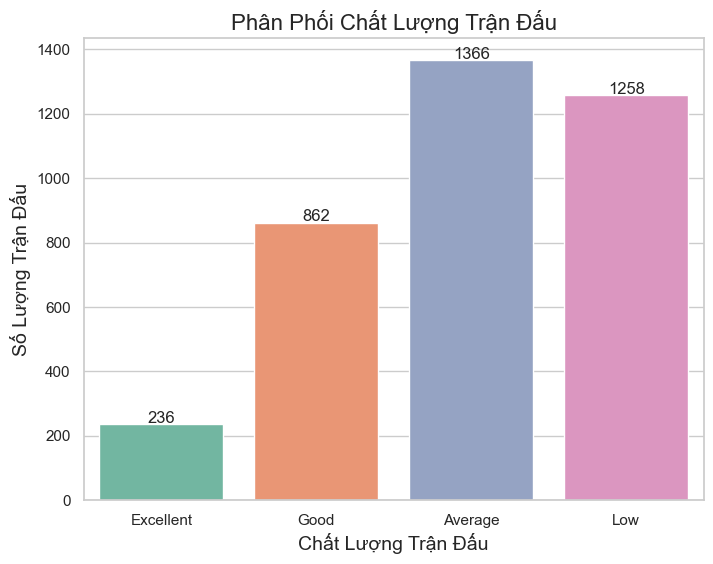

In [254]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.countplot(x='Match_Quality', data=match_overview_df, order=['Excellent', 'Good', 'Average', 'Low'], palette='Set2')

plt.title('Phân Phối Chất Lượng Trận Đấu', fontsize=16)
plt.xlabel('Chất Lượng Trận Đấu', fontsize=14)
plt.ylabel('Số Lượng Trận Đấu', fontsize=14)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 5, int(height), ha="center")

plt.show()

In [255]:
merged_df = pd.merge(match_overview_df, match_statistics_df, left_on='Match ID', right_on='match_id', how='left')

In [256]:
merged_df.sample(3)

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner,Match_Quality,match_id,home_total_shots,home_shots_saved,home_corners,home_free_kicks,home_offsides,home_fouls,away_total_shots,away_shots_saved,away_corners,away_free_kicks,away_offsides,away_fouls,home_cards,away_cards
1997,2578039,2015-11-29,15/16,Norwich City,Arsenal FC,4-2-3-1,4-2-3-1,1:1,Draw,Average,2578039.0,2.0,1.0,3.0,8.0,8.0,3.0,2.0,1.0,6.0,11.0,6.0,2.0,1.0,1.0
1937,2577975,2015-10-03,15/16,Chelsea FC,Southampton FC,4-2-3-1,4-4-1-1,1:3,Southampton FC,Good,2577975.0,3.0,4.0,4.0,17.0,14.0,1.0,7.0,2.0,6.0,15.0,14.0,3.0,2.0,5.0
1656,3592059,2021-12-16,21/22,Liverpool FC,Newcastle United,4-3-3 Attacking,4-3-3 Attacking,3:1,Liverpool FC,Good,3592059.0,23.0,2.0,11.0,4.0,9.0,2.0,5.0,6.0,0.0,9.0,4.0,1.0,1.0,3.0


In [257]:
merged_df.drop(['match_id'], axis=1, inplace=True)

In [258]:
merged_df

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner,Match_Quality,home_total_shots,home_shots_saved,home_corners,home_free_kicks,home_offsides,home_fouls,away_total_shots,away_shots_saved,away_corners,away_free_kicks,away_offsides,away_fouls,home_cards,away_cards
0,3050173,2018-08-11,18/19,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2,Tottenham Hotspur,Average,2.0,4.0,3.0,12.0,11.0,1.0,6.0,1.0,5.0,12.0,12.0,0.0,2.0,2.0
1,3050169,2018-08-11,18/19,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2,Crystal Palace,Low,6.0,7.0,5.0,14.0,8.0,2.0,9.0,6.0,5.0,10.0,11.0,3.0,1.0,2.0
2,3050168,2018-08-11,18/19,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0,AFC Bournemouth,Low,3.0,1.0,7.0,10.0,12.0,0.0,1.0,0.0,4.0,12.0,8.0,2.0,1.0,1.0
3,3050176,2018-08-11,18/19,Wolverhampton Wanderers,Everton FC,3-4-3,4-2-3-1,2:2,Draw,Good,4.0,3.0,3.0,10.0,7.0,2.0,5.0,2.0,6.0,9.0,7.0,3.0,0.0,3.0
4,3050172,2018-08-10,18/19,Manchester United,Leicester City,4-1-4-1,4-4-2 double 6,2:1,Manchester United,Good,6.0,3.0,2.0,9.0,11.0,4.0,4.0,4.0,5.0,15.0,7.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,4095461,2024-05-19,23/24,Sheffield United,Tottenham Hotspur,5-3-2,4-2-3-1,0:3,Tottenham Hotspur,Low,6.0,6.0,2.0,7.0,11.0,6.0,18.0,1.0,6.0,11.0,9.0,0.0,2.0,0.0
3718,4095443,2024-05-11,23/24,Everton FC,Sheffield United,4-4-1-1,3-5-2 flat,1:0,Everton FC,Low,15.0,1.0,3.0,11.0,6.0,3.0,13.0,6.0,6.0,6.0,11.0,0.0,1.0,2.0
3719,4095459,2024-05-19,23/24,Luton Town,Fulham FC,3-4-3,4-2-3-1,2:4,Fulham FC,Low,15.0,3.0,4.0,20.0,15.0,8.0,15.0,4.0,4.0,14.0,20.0,1.0,5.0,4.0
3720,4095452,2024-05-19,23/24,Arsenal FC,Everton FC,4-3-3 Attacking,4-4-1-1,2:1,Arsenal FC,Average,26.0,1.0,8.0,10.0,8.0,1.0,5.0,4.0,1.0,8.0,11.0,4.0,4.0,3.0


Ở đây, ta sẽ cộng tổng các thông số lại **total_shots**, **shots_saved**, **corners**, **free_kicks**

In [259]:
merged_df['Home_Total_Stats'] = (
    merged_df['home_total_shots'] +
    merged_df['home_shots_saved'] +
    merged_df['home_corners'] +
    merged_df['home_free_kicks'] 
)

merged_df['Away_Total_Stats'] = (
    merged_df['away_total_shots'] +
    merged_df['away_shots_saved'] +
    merged_df['away_corners'] +
    merged_df['away_free_kicks'] 
)

In [260]:
merged_df

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner,Match_Quality,home_total_shots,home_shots_saved,home_corners,home_free_kicks,home_offsides,home_fouls,away_total_shots,away_shots_saved,away_corners,away_free_kicks,away_offsides,away_fouls,home_cards,away_cards,Home_Total_Stats,Away_Total_Stats
0,3050173,2018-08-11,18/19,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2,Tottenham Hotspur,Average,2.0,4.0,3.0,12.0,11.0,1.0,6.0,1.0,5.0,12.0,12.0,0.0,2.0,2.0,21.0,24.0
1,3050169,2018-08-11,18/19,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2,Crystal Palace,Low,6.0,7.0,5.0,14.0,8.0,2.0,9.0,6.0,5.0,10.0,11.0,3.0,1.0,2.0,32.0,30.0
2,3050168,2018-08-11,18/19,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0,AFC Bournemouth,Low,3.0,1.0,7.0,10.0,12.0,0.0,1.0,0.0,4.0,12.0,8.0,2.0,1.0,1.0,21.0,17.0
3,3050176,2018-08-11,18/19,Wolverhampton Wanderers,Everton FC,3-4-3,4-2-3-1,2:2,Draw,Good,4.0,3.0,3.0,10.0,7.0,2.0,5.0,2.0,6.0,9.0,7.0,3.0,0.0,3.0,20.0,22.0
4,3050172,2018-08-10,18/19,Manchester United,Leicester City,4-1-4-1,4-4-2 double 6,2:1,Manchester United,Good,6.0,3.0,2.0,9.0,11.0,4.0,4.0,4.0,5.0,15.0,7.0,2.0,2.0,1.0,20.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,4095461,2024-05-19,23/24,Sheffield United,Tottenham Hotspur,5-3-2,4-2-3-1,0:3,Tottenham Hotspur,Low,6.0,6.0,2.0,7.0,11.0,6.0,18.0,1.0,6.0,11.0,9.0,0.0,2.0,0.0,21.0,36.0
3718,4095443,2024-05-11,23/24,Everton FC,Sheffield United,4-4-1-1,3-5-2 flat,1:0,Everton FC,Low,15.0,1.0,3.0,11.0,6.0,3.0,13.0,6.0,6.0,6.0,11.0,0.0,1.0,2.0,30.0,31.0
3719,4095459,2024-05-19,23/24,Luton Town,Fulham FC,3-4-3,4-2-3-1,2:4,Fulham FC,Low,15.0,3.0,4.0,20.0,15.0,8.0,15.0,4.0,4.0,14.0,20.0,1.0,5.0,4.0,42.0,37.0
3720,4095452,2024-05-19,23/24,Arsenal FC,Everton FC,4-3-3 Attacking,4-4-1-1,2:1,Arsenal FC,Average,26.0,1.0,8.0,10.0,8.0,1.0,5.0,4.0,1.0,8.0,11.0,4.0,4.0,3.0,45.0,18.0


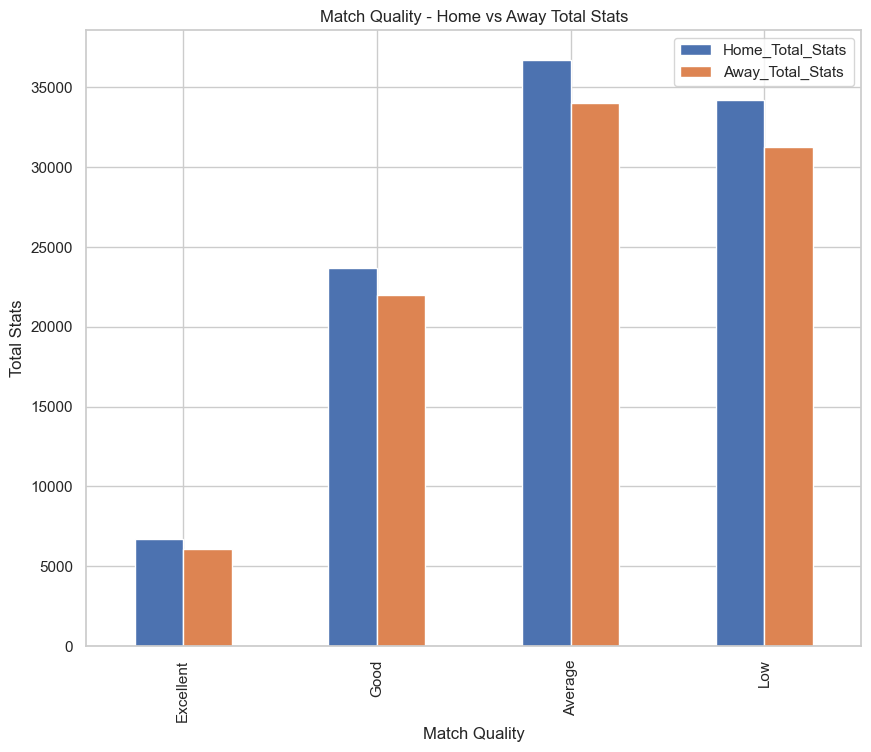

In [261]:
quality_order = ['Excellent', 'Good', 'Average', 'Low']
merged_df['Match_Quality'] = pd.Categorical(merged_df['Match_Quality'], categories=quality_order, ordered=True)

quality_stats = merged_df.groupby('Match_Quality')[['Home_Total_Stats', 'Away_Total_Stats']].sum()

plt.rcParams["figure.figsize"] = (10, 8)

quality_stats.plot(kind='bar')

plt.title("Match Quality - Home vs Away Total Stats")
plt.xlabel("Match Quality")
plt.ylabel("Total Stats")

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
- Các trận đấu chất lượng cao (Excellent) lại có số liệu thống kê thấp hơn nhiều, có thể do các đội bóng thi đấu thận trọng hơn và ít tạo ra cơ hội.

- Các trận đấu có chất lượng Low và Average có số liệu thống kê cao nhất, đặc biệt là trên sân nhà. Điều này có thể phản ánh lối chơi cởi mở, thiếu kiểm soát trong các trận đấu này, dẫn đến nhiều tình huống bóng lăn xả

## Câu hỏi 2: Đội hình ra sân ảnh hưởng đến tỷ Lệ chuyển đổi cú sút thành bàn thắng ra sao ?

**Ý nghĩa khi trả lời câu hỏi này:**
- Xác định những chiến thuật đội hình hiệu quả nhất trong việc chuyển đổi cú sút thành bàn thắng.
Các cột liên quan:
- **Match Quality:** Chất lượng trận đấu (Average, Excellent, Good, Low).
- **Winner:** Đội thắng.

Đầu tiên, ta cần tách số lượng bàn ghi trong cột Fulltime Score

In [262]:
def split_score(score):
    home_goals, away_goals = score.split(':')
    return int(home_goals), int(away_goals)

# Áp dụng hàm để tạo hai cột mới: 'home_goals' và 'away_goals'
merged_df[['home_goals', 'away_goals']] = merged_df['Fulltime Score'].apply(lambda x: pd.Series(split_score(x)))

In [263]:
merged_df['home_conversion_rate'] = merged_df['home_goals'] / merged_df['home_total_shots'].replace(0, 1)
merged_df['away_conversion_rate'] = merged_df['away_goals'] / merged_df['away_total_shots'].replace(0, 1)

Ngoài ra, ta cũng cần chuyển đổi đội hình dư thừa, sang đội hình cụ thể. Ví dụ '4-3-3 Attacking' -> '4-3-3'

In [264]:
def extract_formation(lineup):
    if pd.isnull(lineup):
        return 'Unknown'
    # Tìm kiếm bất kỳ chuỗi số và dấu gạch ngang nào
    match = re.match(r'(\d+-\d+-\d+(-\d+)*)', lineup)
    if match:
        return match.group(1)
    else:
        return 'Unknown'

# Áp dụng hàm để tạo các cột mới: 'Home Formation' và 'Away Formation'
merged_df['Home Formation'] = merged_df['Home Lineup'].apply(extract_formation)
merged_df['Away Formation'] = merged_df['Away Lineup'].apply(extract_formation)



Sau đó, ta tính tỷ lệ chuyển đổi bàn thắng và groupby đội hình chiến thuật

In [265]:
home_stats = merged_df.groupby('Home Formation').agg(
    total_shots_home=('home_total_shots', 'sum'),
    total_goals_home=('home_goals', 'sum')
).reset_index()

away_stats = merged_df.groupby('Away Formation').agg(
    total_shots_away=('away_total_shots', 'sum'),
    total_goals_away=('away_goals', 'sum')
).reset_index()

home_stats.rename(columns={'Home Formation': 'Formation'}, inplace=True)
away_stats.rename(columns={'Away Formation': 'Formation'}, inplace=True)

total_stats = pd.merge(home_stats, away_stats, on='Formation', how='outer').fillna(0)

total_stats['total_shots'] = total_stats['total_shots_home'] + total_stats['total_shots_away']
total_stats['total_goals'] = total_stats['total_goals_home'] + total_stats['total_goals_away']


total_stats['conversion_rate'] = total_stats['total_goals'] / total_stats['total_shots'].replace(0, 1)

total_stats_sorted = total_stats.sort_values(by='conversion_rate', ascending=False)

print(total_stats_sorted[['Formation', 'total_shots', 'total_goals', 'conversion_rate']])


   Formation  total_shots  total_goals  conversion_rate
0    3-1-4-2        138.0           33         0.239130
14     4-5-1        224.0           49         0.218750
7    4-1-4-1       4815.0          983         0.204154
12   4-4-1-1       1522.0          306         0.201051
9    4-3-1-2        842.0          162         0.192399
13     4-4-2       7492.0         1437         0.191805
10   4-3-2-1        307.0           57         0.185668
3    3-4-2-1       3709.0          677         0.182529
16     5-4-1       1808.0          327         0.180863
8    4-2-3-1      18596.0         3349         0.180092
11     4-3-3      12336.0         2077         0.168369
4      3-4-3       1703.0          277         0.162654
5      3-5-2       2982.0          464         0.155600
6    4-1-3-2          7.0            1         0.142857
15     5-3-2        671.0           92         0.137109
2    3-4-1-2        807.0          104         0.128872
1    3-3-3-1         39.0            5         0

Sau khi đã có kết quả bên trên, ta trực quan hóa dữ liệu thu được

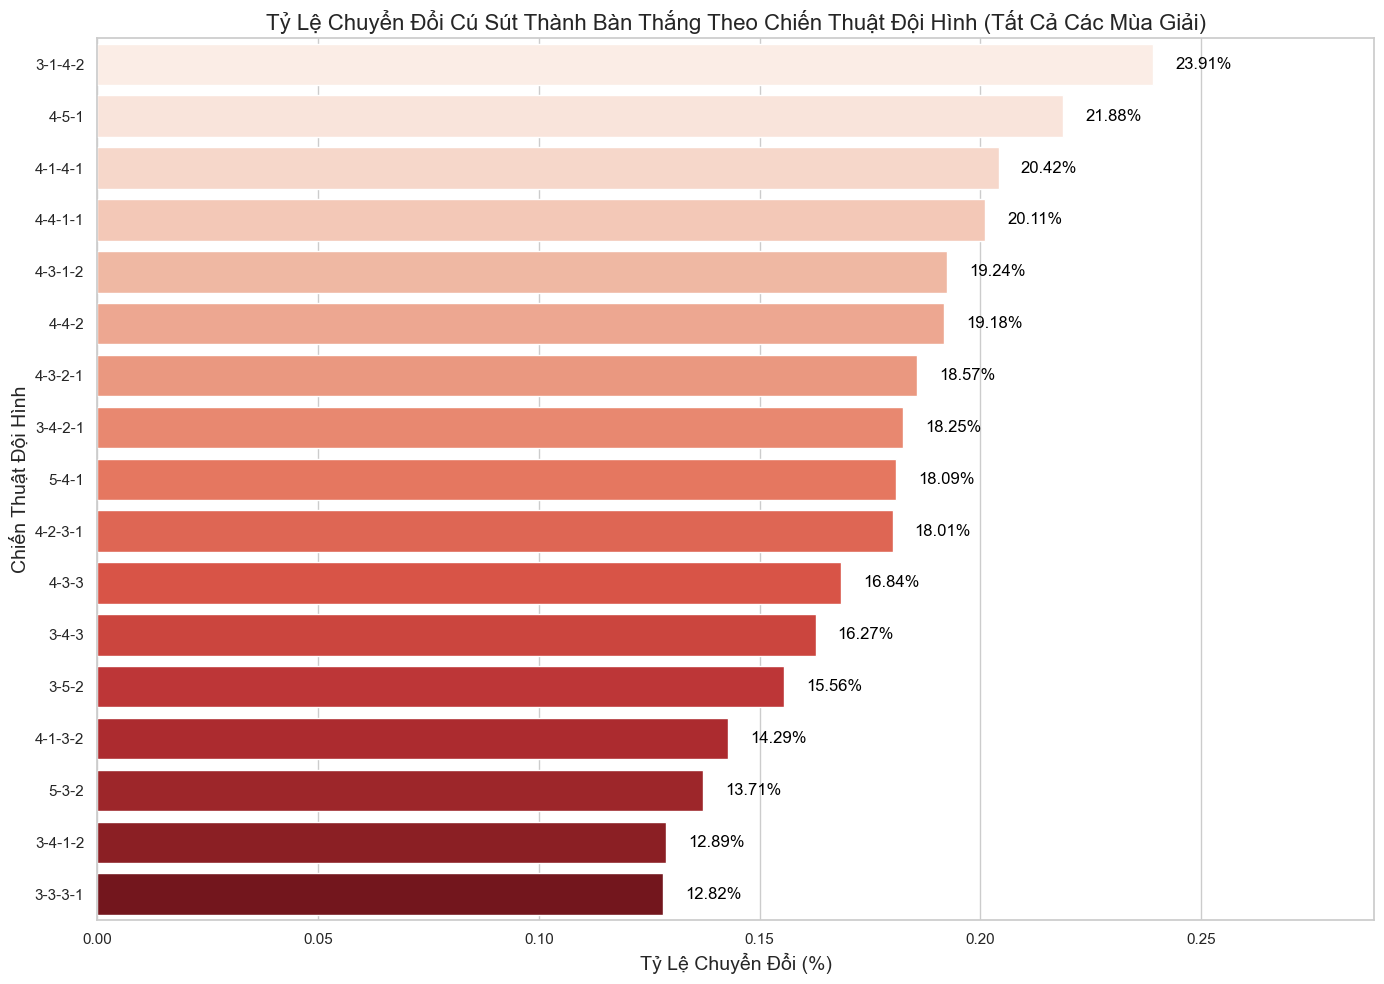

In [266]:
sns.set(style="whitegrid")

colors = [
    "#FF5733", "#C70039", "#900C3F", "#581845", "#FF0000", 
    "#FF4500", "#DC143C", "#B22222", "#FF6347", "#FF7F50",
    "#FF8C00", "#FF69B4", "#FF1493"
]

if len(colors) < len(total_stats_sorted):
    colors = sns.color_palette("Reds", len(total_stats_sorted))

plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(
    x='conversion_rate', 
    y='Formation', 
    data=total_stats_sorted, 
    palette=colors[:len(total_stats_sorted)]  
)

for index, value in enumerate(total_stats_sorted['conversion_rate']):
    plt.text(
        value + 0.005,  
        index,           
        f'{value:.2%}', 
        va='center',     
        fontsize=12,
        color='black'
    )


plt.title('Tỷ Lệ Chuyển Đổi Cú Sút Thành Bàn Thắng Theo Chiến Thuật Đội Hình (Tất Cả Các Mùa Giải)', fontsize=16)
plt.xlabel('Tỷ Lệ Chuyển Đổi (%)', fontsize=14)
plt.ylabel('Chiến Thuật Đội Hình', fontsize=14)


plt.xlim(0, total_stats_sorted['conversion_rate'].max() + 0.05)


plt.tight_layout()
plt.show()

**Nhận xét: Cách sử dụng đội hình ở EPL Cup**

- Đội hình 4-3-3, mặc dù có một hệ thống tấn công mạnh mẽ với ba tiền đạo, nhưng tỷ lệ chuyển đổi của nó không được cao. Điều này có thể giải thích rằng mặc dù có nhiều cơ hội tấn công, nhưng nếu đội không tận dụng được tốt các cơ hội hoặc thiếu sự kết nối giữa các tuyến, tỷ lệ chuyển đổi sẽ không cao.

- Đội hình 4-5-1 và các biến thể của đội hình 4-4-x (như 4-4-2, 4-4-1-1) có tỷ lệ chuyển đổi cao hơn so với các đội hình khác. Điều này có thể cho thấy đội hình có nhiều tiền vệ có xu hướng kiểm soát bóng tốt hơn, từ đó tạo ra cơ hội ghi bàn hiệu quả hơn.

- Đội hình 3-1-4-2, mặc dù có thể phòng ngự tốt (với 3 hậu vệ trung tâm và 1 tiền vệ phòng ngự), nhưng lại có tỷ lệ chuyển đổi thấp hơn. Điều này cho thấy những đội hình thiên về phòng ngự thường gặp khó khăn trong việc tận dụng các cơ hội tấn công, mặc dù họ có thể giữ được sự vững chắc ở hàng phòng ngự.

## Câu hỏi 3: Lịch sử đối đầu giữa các đội như thế nào?

**Ý nghĩa khi trả lời câu hỏi:**

- Đội bóng mạnh trong lịch sử đối đầu: Đội thắng nhiều lần trong các cuộc đối đầu trước đây có thể có lợi thế về mặt chiến thuật, tinh thần và động lực trong trận đấu tiếp theo.

- Nếu một đội bóng luôn có kết quả tốt trong các lần gặp nhau trước đây (tỷ lệ thắng cao, ít hòa), điều đó có thể dự báo rằng đội đó có khả năng duy trì phong độ và tiếp tục chiến thắng trong tương lai.

- Mục tiêu của việc phân tích lịch sử đối đầu là giúp hiểu rõ hơn về mối quan hệ giữa các đội bóng, từ đó có thể dự đoán kết quả trận đấu tiếp theo và đưa ra các chiến lược phù hợp cho các đội bóng, huấn luyện viên, hoặc các nhà phân tích thể thao.

Đầu tiên, ta sẽ nhìn lại DataFrame match_overview_df

In [267]:
match_overview_df.head(3)

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner,Match_Quality
0,3050173,2018-08-11,18/19,Newcastle United,Tottenham Hotspur,4-4-1-1,4-3-2-1,1:2,Tottenham Hotspur,Average
1,3050169,2018-08-11,18/19,Fulham FC,Crystal Palace,4-3-3 Attacking,4-4-2,0:2,Crystal Palace,Low
2,3050168,2018-08-11,18/19,AFC Bournemouth,Cardiff City,4-4-2 double 6,4-1-4-1,2:0,AFC Bournemouth,Low


Để tính toán được lịch sử đối đầu, ta cần sắp xếp lại mùa giải, cũng như là ngày xảy ra trận đấu

In [268]:
match_overview_df['Date'] = pd.to_datetime(match_overview_df['Date'])

match_overview_df_sorted = match_overview_df.sort_values(by=['Season', 'Date'])

match_overview_df_sorted.head(3)

,Match ID,Date,Season,Home Team,Away Team,Home Lineup,Away Lineup,Fulltime Score,Winner,Match_Quality
370,2460298,2014-08-16,14/15,Leicester City,Everton FC,4-4-2 double 6,4-2-3-1,2:2,Draw,Low
371,2460302,2014-08-16,14/15,Queens Park Rangers,Hull City,5-3-2,5-4-1,0:1,Hull City,Low
372,2460303,2014-08-16,14/15,Stoke City,Aston Villa,4-2-3-1,4-3-3 Attacking,0:1,Aston Villa,Low


Tiếp theo, ta sẽ phân tích Thành tích đối đầu. Đầu tiên, ta khởi tạo một dataFrame để lưu trữ kết quả đối đầu giữa các đội, bao gồm số trận thắng của mỗi đội và số trận hòa. Hàm update_head_to_head duyệt qua từng trận đấu trong dữ liệu, kiểm tra xem hai đội đã gặp nhau trước đó chưa, và nếu chưa, sẽ thêm một bản ghi mới với tỷ lệ thắng 100% cho đội chiến thắng. Nếu đã gặp nhau, kết quả trận đấu sẽ được cập nhật vào lịch sử đối đầu của họ. Hàm này trả về history đã được cập nhật sau khi duyệt qua tất cả các trận đấu.

In [269]:
history = pd.DataFrame(columns=['Team1', 'Team2', 'Wins_Team1', 'Wins_Team2', 'Draws'])

def update_head_to_head(df):
    global history

    for index, row in df.iterrows():
        team1 = row['Home Team']
        team2 = row['Away Team']
        winner = row['Winner']

        match = history[(history['Team1'] == team1) & (history['Team2'] == team2)]
        
        if match.empty:
            new_match = pd.DataFrame({'Team1': [team1], 'Team2': [team2], 'Wins_Team1': [1 if winner == team1 else 0], 
                                      'Wins_Team2': [1 if winner == team2 else 0], 'Draws': [1 if winner == 'Draw' else 0]})
            history = pd.concat([history, new_match], ignore_index=True)
        else:
            if winner == team1:
                history.loc[(history['Team1'] == team1) & (history['Team2'] == team2), 'Wins_Team1'] += 1
            elif winner == team2:
                history.loc[(history['Team1'] == team1) & (history['Team2'] == team2), 'Wins_Team2'] += 1
            else:
                history.loc[(history['Team1'] == team1) & (history['Team2'] == team2), 'Draws'] += 1

    return history

history = update_head_to_head(match_overview_df_sorted)


In [270]:
history.sample(5)

,Team1,Team2,Wins_Team1,Wins_Team2,Draws
787,Leeds United,Everton FC,0,1,2
825,Brighton & Hove Albion,Brentford FC,2,0,1
741,Crystal Palace,Sheffield United,2,1,0
243,Chelsea FC,Burnley FC,3,1,4
625,Crystal Palace,Wolverhampton Wanderers,4,1,1


In [271]:
history_temp = history.copy()

Hàm dưới đây để loại bỏ các cặp đấu trùng nhau, chỉ mang ý nghĩa xử lý dữ liệu trùng lặp

In [272]:

def sort_teams_and_update_wins(row):
    team1, team2 = row['Team1'], row['Team2']
    wins_team1, wins_team2 = row['Wins_Team1'], row['Wins_Team2']
    
    # Nếu Team1 lớn hơn Team2 theo thứ tự alphabet, đổi chỗ cả tên đội và số trận thắng
    if team1 > team2:
        return pd.Series([team2, team1, wins_team2, wins_team1], index=['Team1', 'Team2', 'Wins_Team1', 'Wins_Team2'])
    
    return pd.Series([team1, team2, wins_team1, wins_team2], index=['Team1', 'Team2', 'Wins_Team1', 'Wins_Team2'])

history_temp[['Team1', 'Team2', 'Wins_Team1', 'Wins_Team2']] = history_temp.apply(sort_teams_and_update_wins, axis=1)


In [273]:
history_temp = history_temp.drop_duplicates(subset=['Team1', 'Team2'], keep='first')

In [274]:
history_temp.sample(10)

,Team1,Team2,Wins_Team1,Wins_Team2,Draws
612,West Ham United,Wolverhampton Wanderers,3,2,0
614,Arsenal FC,Cardiff City,1,0,0
604,AFC Bournemouth,Cardiff City,1,0,0
6,Manchester United,Swansea City,2,1,1
38,Arsenal FC,Aston Villa,4,3,0
139,Everton FC,Manchester City,0,6,4
50,Manchester United,West Ham United,7,0,3
404,Watford FC,West Ham United,2,3,1
650,Fulham FC,West Ham United,1,2,1
400,Stoke City,Watford FC,1,1,1


Ngoài ra khi nhìn kĩ lại thì ta sẽ nhận thấy, có một số đội bóng không còn đá ở mùa giải 23/24 nữa, nên ta chỉ cần xét đến những lịch sử đối đầu của những đội bóng nào còn đá để thuận tiện phân tích về sau

In [275]:
season_23_24 = team_profile_df[team_profile_df['Season'] == '23/24']
unique_clubs = season_23_24['Club'].unique()
unique_clubs

array(['Manchester City', 'Arsenal FC', 'Chelsea FC', 'Liverpool FC',
       'Tottenham Hotspur', 'Manchester United', 'Aston Villa',
       'Newcastle United', 'Brighton & Hove Albion', 'Nottingham Forest',
       'West Ham United', 'Crystal Palace', 'Wolverhampton Wanderers',
       'Brentford FC', 'AFC Bournemouth', 'Everton FC', 'Fulham FC',
       'Burnley FC', 'Sheffield United', 'Luton Town'], dtype=object)

In [276]:
history_temp = history_temp[
    history_temp['Team1'].isin(unique_clubs) & history_temp['Team2'].isin(unique_clubs)
]

In [277]:
history_temp

,Team1,Team2,Wins_Team1,Wins_Team2,Draws
4,Tottenham Hotspur,West Ham United,4,4,2
5,Arsenal FC,Crystal Palace,5,1,4
8,Manchester City,Newcastle United,5,1,3
9,Burnley FC,Chelsea FC,0,7,1
10,Aston Villa,Newcastle United,4,1,2
...,...,...,...,...,...
910,Luton Town,Sheffield United,1,0,0
913,Brighton & Hove Albion,Luton Town,0,1,0
919,Crystal Palace,Luton Town,0,0,1
920,AFC Bournemouth,Luton Town,1,0,0


Để dễ trực quan hóa hơn, ta sẽ ưu tiên những đội có trận thắng cao hơn là Team1

In [278]:
history_temp[['Team1', 'Team2', 'Wins_Team1', 'Wins_Team2']] = history_temp.apply(
    lambda x: [x['Team2'], x['Team1'], x['Wins_Team2'], x['Wins_Team1']] if x['Wins_Team2'] > x['Wins_Team1'] 
              else [x['Team1'], x['Team2'], x['Wins_Team1'], x['Wins_Team2']],
    axis=1, result_type='expand')

# Cập nhật lại tên cột
history_temp.columns = ['Team1', 'Team2', 'Wins_Team1', 'Wins_Team2', 'Draws']

# Kiểm tra kết quả
history_temp.head()

,Team1,Team2,Wins_Team1,Wins_Team2,Draws
4,Tottenham Hotspur,West Ham United,4,4,2
5,Arsenal FC,Crystal Palace,5,1,4
8,Manchester City,Newcastle United,5,1,3
9,Chelsea FC,Burnley FC,7,0,1
10,Aston Villa,Newcastle United,4,1,2


Tiếp theo, ta cần ưu tiên sắp xếp lại những cặp đấu mà đội Team1 có trận thắng cao vượt trội hơn theo thứ tự giảm dần. Rồi sau đó ta mới sắp xếp theo tỷ lệ thắng

In [279]:

def calculate_win_ratio(row):
    return max(row['Wins_Team1'], row['Wins_Team2']) / (row['Wins_Team1'] + row['Wins_Team2'] + row['Draws']) 

history_temp['Win_Ratio'] = history_temp.apply(calculate_win_ratio, axis=1)

history_temp['max_point'] = history_temp[['Wins_Team1', 'Wins_Team2']].max(axis=1)

history_temp_sorted = history_temp.sort_values(by=['max_point', 'Win_Ratio'], ascending=[False, False])


In [280]:
history_temp_sorted.head(15)

,Team1,Team2,Wins_Team1,Wins_Team2,Draws,Win_Ratio,max_point
67,Chelsea FC,Crystal Palace,9,1,0,0.900000,9
136,Tottenham Hotspur,Crystal Palace,9,0,1,0.900000,9
148,Arsenal FC,Newcastle United,8,0,1,0.888889,8
111,Liverpool FC,Crystal Palace,8,1,1,0.800000,8
397,Manchester City,AFC Bournemouth,7,0,0,1.000000,7
427,Arsenal FC,AFC Bournemouth,7,0,0,1.000000,7
9,Chelsea FC,Burnley FC,7,0,1,0.875000,7
158,Tottenham Hotspur,Burnley FC,7,0,1,0.875000,7
172,Liverpool FC,Burnley FC,7,1,0,0.875000,7
177,Manchester City,Burnley FC,7,0,1,0.875000,7


<Figure size 1400x800 with 0 Axes>

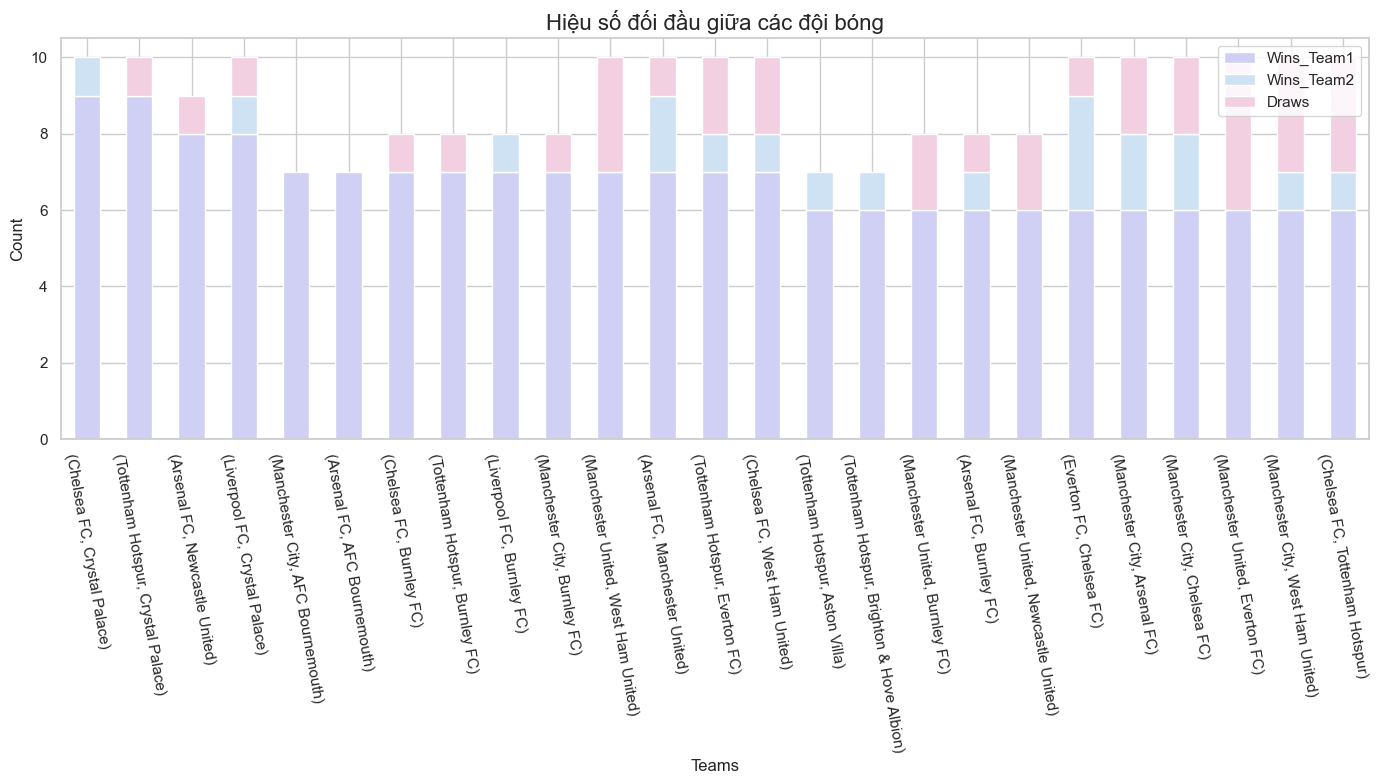

In [281]:
plt.figure(figsize=(14, 8))

# Lọc dữ liệu cho 20 trận đầu tiên
history_temp_sorted[['Team1', 'Team2', 'Wins_Team1', 'Wins_Team2', 'Draws']].head(25)\
    .set_index(['Team1', 'Team2'])\
    .plot(kind='bar', stacked=True, figsize=(14, 8), color=['#cfd0f3', '#cfe2f3', '#f3cfe2'])

plt.title('Hiệu số đối đầu giữa các đội bóng', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=280)
plt.tight_layout()
plt.show()

**Nhận xét biểu đồ:**


- Các đội như Manchester City, Arsenal FC, và Tottenham Hotspur không chỉ có nhiều chiến thắng mà còn duy trì ổn định trong các trận đấu. Họ đều có nhiều trận thắng với số điểm cao (thường xuyên giành điểm tối đa là 7, 8 hoặc 9). Điều này cho thấy sự thống trị của những đội bóng này không chỉ là chiến thắng mà còn là khả năng duy trì phong độ cao trong các cuộc đối đầu.


## Câu hỏi 4: Mối quan hệ giữa Thứ Hạng và Tổng thị trường chuyển nhượng của đội bóng có phải là một yếu tố quan trọng trong việc đánh giá giá trị thị trường của các đội bóng qua các mùa giải không?


**Ý nghĩa khi trả lời câu hỏi:** Câu hỏi này giúp đánh giá mối quan hệ giữa thành tích thi đấu của các đội bóng (qua thứ hạng) và giá trị thị trường của họ. Nếu có mối quan hệ chặt chẽ, có thể sử dụng giá trị thị trường để dự đoán thứ hạng đội bóng trong các mùa giải tương lai.



Trước tiên, ta cần kết hợp lại giữa thứ hạng đội bóng và Tổng Thị Trường chuyển nhượng của các đội bóng đó qua các mùa giải.

In [282]:
merged_df = pd.merge(team_ranking_df, team_profile_df, how='inner', left_on=['Team', 'Season'], right_on=['Club', 'Season'])

- Với mỗi mùa giải, chúng em sẽ tạo biểu đồ Bar Chart thể hiện tổng giá trị thị trường (Total market value) của các đội bóng, xếp hạng đội bóng theo thứ tự từ cao xuống thấp (vị trí thứ hạng cao nhất ở trên cùng). 

- Mỗi đội bóng tương ứng với một màu sắc riêng biệt

- Tương ứng với 10 mùa giải, ta sẽ có kết quả hình ảnh của 10 Bar Chart. Ta sẽ lưu vào một video để tiện trực quan hóa rõ hơn 

In [283]:
teams = merged_df['Team'].unique()
colors1 = plt.cm.get_cmap('PuRd_r', 20) 
colors2 = plt.cm.get_cmap('YlOrBr_r', 20)  


all_colors = list(colors1(np.linspace(0, 1, 20))) + list(colors2(np.linspace(0, 1, 10)))  # Kết hợp 2 bảng màu

if len(all_colors) < len(teams):
    all_colors = all_colors * (len(teams) // len(all_colors)) + all_colors[:len(teams) % len(all_colors)]

team_color_map = {team: all_colors[i] for i, team in enumerate(teams)}  # Ánh xạ tên đội bóng với màu

if len(all_colors) < len(teams):
    all_colors = all_colors * (len(teams) // len(all_colors)) + all_colors[:len(teams) % len(all_colors)]

team_color_map = {team: all_colors[i] for i, team in enumerate(teams)}  # Ánh xạ tên đội bóng với màu

frames = []
output_folder = 'seasons_frames'
os.makedirs(output_folder, exist_ok=True)

teams = merged_df['Team'].unique()
colors1 = plt.cm.get_cmap('PuRd_r', 20) 
colors2 = plt.cm.get_cmap('YlOrBr_r', 20)  

all_colors = list(colors1(np.linspace(0, 1, 20))) + list(colors2(np.linspace(0, 1, 10)))  # Kết hợp 2 bảng màu

if len(all_colors) < len(teams):
    all_colors = all_colors * (len(teams) // len(all_colors)) + all_colors[:len(teams) % len(all_colors)]

team_color_map = {team: all_colors[i] for i, team in enumerate(teams)}

frames = []

for idx, season in enumerate(sorted(merged_df['Season'].unique()), start=1):
    season_data = merged_df[merged_df['Season'] == season]
    season_data = season_data.sort_values(by='Ranking', ascending=False)  # ascending=True để thứ hạng thấp nằm trên
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(season_data['Team'], season_data['Total market value'], color=[team_color_map[team] for team in season_data['Team']])

    ax.set_title(f'Total Market Value by Team for Season {season}')
    ax.set_xlabel('Total Market Value')
    ax.set_ylabel('Team')

    plt.tight_layout()

    image_filename = f"{output_folder}/season_{idx}.png"
    plt.savefig(image_filename)
    frames.append(image_filename)
    plt.close(fig)

clip = ImageSequenceClip(frames, fps=0.2)  # 1 frame/5 seconds
clip.write_videofile('team_market_values_over_seasons.mp4', codec='libx264')

for image in frames:
    os.remove(image)

MoviePy - Building video team_market_values_over_seasons.mp4.
MoviePy - Writing video team_market_values_over_seasons.mp4



MoviePy - Done !
MoviePy - video ready team_market_values_over_seasons.mp4


In [284]:
video_path = "team_market_values_over_seasons.mp4"

# Hiển thị video trong notebook
Video(video_path, embed=True)

**Nhận xét:** Nhìn chung, ta có thể thấy trong đa số các mùa giải, để chạy đua với thành tích cao thì các đội bóng phải chi ra một số tiền khổng lồ. Điều này có thể thấy rõ ở Giá trị chuyển nhượng giữa các dội Top trên và Top dưới.
    
    Một số trường hợp ngoại lệ như mùa giải 15/16 thì vị trí đứng đầu là Leceister City mặc dù chi rất ít tiền, nhưng lại được thứ hạng khủng, là top 1, cho thấy ngoài yếu tố giá trị chuyển nhượng ra thì còn một số yếu tố khác như: Tinh thần đồng đội, sự xuất sắc của một cá nhân, một số nhà cái mafia điều khiển trận đấu,...

    Ngoài ra, cũng tại mùa giải này, ta chứng kiến được một sự đáng thất vọng của Chelsea FC khi họ chi nhiều tiền nhất, nhưng bấy giờ lại có nguy cơ phải xuống hạng. Sau khi tìm hiểu, mùa giải này do chủ tịch Roman Abramovich sa thải Mourinho. Các ngôi sao lớn như Diego Costa, Eden Hazard, Cesc Fabregas, Branislav Ivanovic hay Nemanja Matic đều đồng loạt đánh mất phong độ. 

    Mùa giải 22/23 và 23/24 cũng chứng kiến một tình trạng tương tự xảy ra ở Chelsea FC, cho thấy ta không nên tin tưởng vào đội bóng này khi một trận đấu bóng xảy ra

    Đội đáng tin nhất vẫn là Manchester City, với phong độ không quá nhiều thay đổi, luôn luôn là người nắm giữ vị trí top đầu của EPL